In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import scipy
# import requests
# import os
# import pycountry
# import time
# import gspread
from googletrans import Translator as translator

In [102]:
#Data from adab.com
path = '/Users/eilonzohar/Desktop/Code/Data/all_poems.csv'
data = pd.read_csv (path)
data ["poem_text"] = data ["poem_text"].fillna ("")

In [48]:
#Formats
def thousands(x, pos): #50K, 3K...
    return '{:1.0f}K'.format(x*1e-3)

def thousands_dot(x, pos): #1.5K, 3.2K...
    return '{:1.1f}K'.format(x*1e-3)



In [ ]:
#I'm sure it will be helpful, though still don't know how
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

In [11]:
data.head()

,poem_id,poem_link,poem_style,poem_text,poem_title,poet_cat,poet_id,poet_link,poet_name
0,21,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي...,أنشودة المطر,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب
1,65546,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,انا لا ازال و في يدي قدحي ياليل اين تفرق الشر...,أقداح و أحلام,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب
2,65561,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,علي مقلتيك ارتشفت النجوم وعانقت امالي الايبة ...,هوى واحد !,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب
3,65554,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,اساطير من حشرجات الزمان نسيج اليد البالية رواه...,أساطير,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب
4,65550,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,والتف حولك ساعداي ومال جيدك في اشتهاء كالزهرة ...,اللقاء الأخير,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب


In [77]:
#Demography of poets (poet_cat)

labels1 = data ["poet_cat"].unique()
translated_labels1, hist1 = [], []
for label in labels1:
 if len (data [data["poet_cat"] == label]) < 1000:
  continue
 translated_labels1.append (translator().translate (label, dest= "en").text)
 hist1.append (len (data [data["poet_cat"] == label]))

Text(0.5, 1.0, 'Demography of poets')

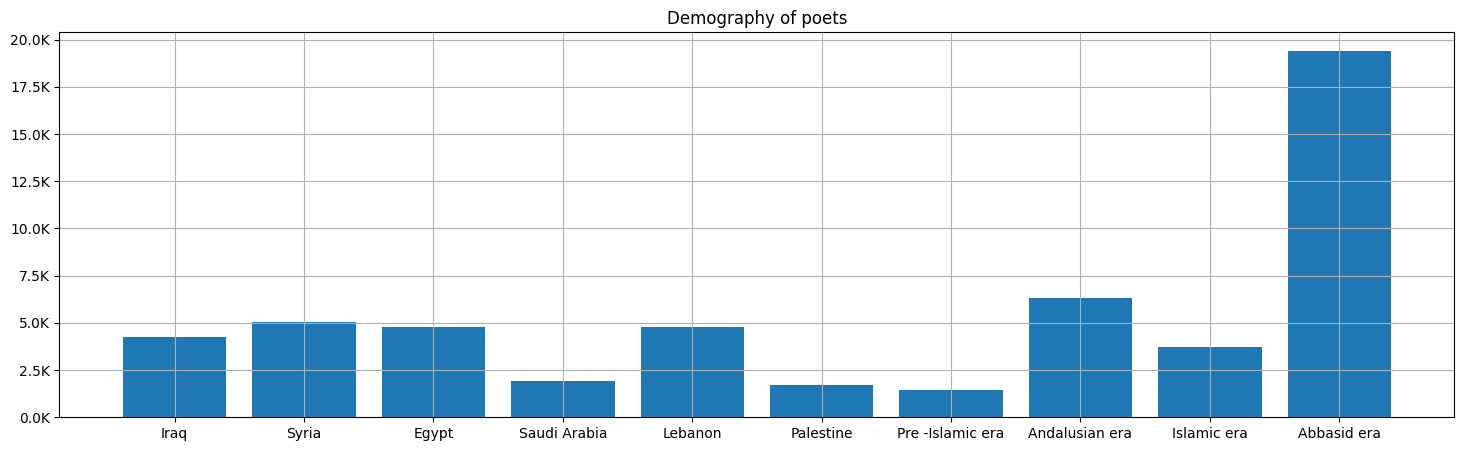

In [122]:
fig, ax = plt.subplots (figsize= (18, 5))
ax.bar (translated_labels1, hist1)
ax.grid()
ax.yaxis.set_major_formatter (thousands_dot)
ax.set_title ("Demography of poets")

In [124]:
#Number of words per category
labels2 = data ["poet_cat"].unique()
translated_labels2, hist2, hist_std2 = [], [], []
for label in labels2:
 translated_labels2.append (translator().translate (label, dest= "en").text)
 hist2.append (np.round(np.array ([len (data [data["poet_cat"] == label]["poem_text"][idx].split(" ")) for idx in data [data["poet_cat"] == label].index]).mean(), 0))
 hist_std2.append (np.round(np.array ([len (data [data["poet_cat"] == label]["poem_text"][idx].split(" ")) for idx in data [data["poet_cat"] == label].index]).std(), 0))


**Explanation of last line above:**

for each label (=poet category):

"data [data["poet_cat"] == label]["poem_text"][idx]" is the text of the poem at index number (idx). string type

split by " " = changing the string to a list of strings which are the words (because its split by space)

len = the length of this list (= the number of words)

for idx in data [data["poet_cat"] == label].index meaning this is done for each index, making a list of the number of words of any poem regarding this poet type (label)

lets call this list A

then std of A is taken. to do this, A is converted from list to np.array

finally, (round, 0). for example: 1.342 -> 1

now we have tanslated_labels2 which is the list of the labels and hist_std2 which is the corresponding list of the std words count.

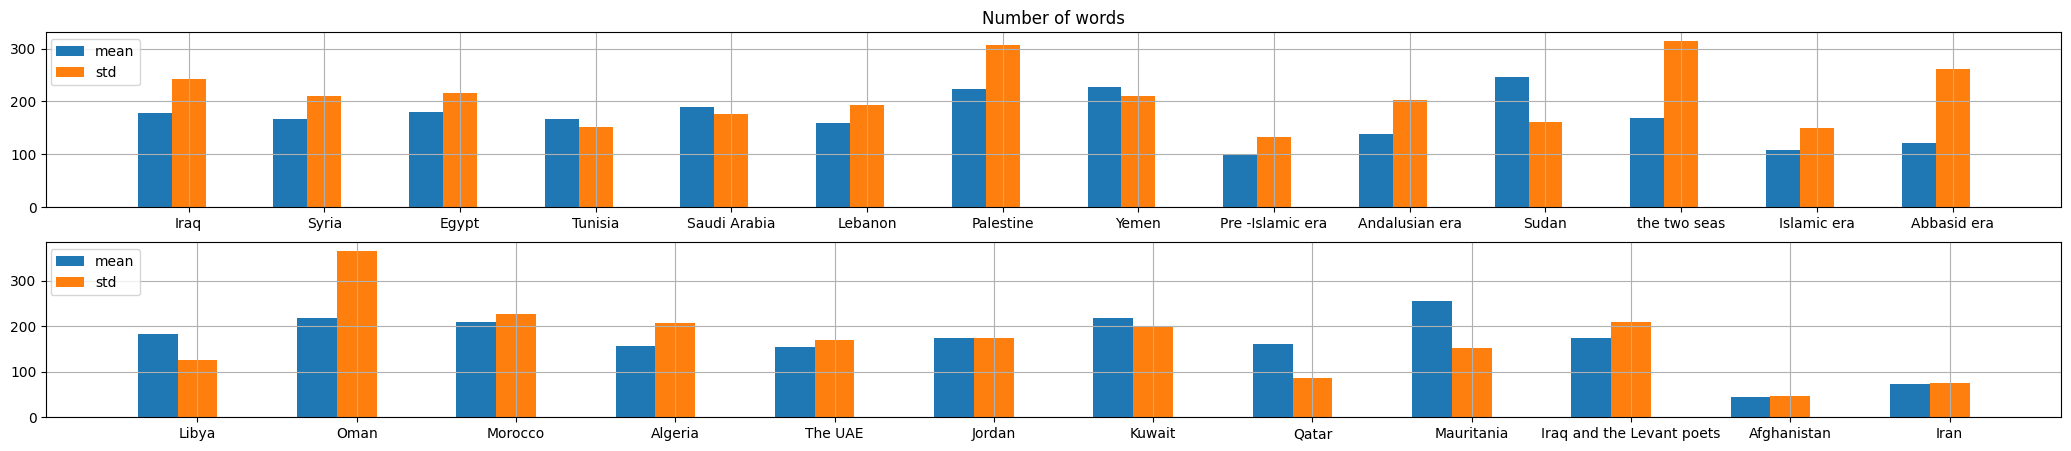

In [147]:
fig, ax = plt.subplots (nrows= 2, figsize= (26, 5))

#Top
N = len (translated_labels2[:14])
ind = np.arange(N)  
width = 0.25
  
xvals = hist2 [:14] 
bar1 = ax [0].bar(ind, xvals, width) 
  
yvals = hist_std2 [:14]
bar2 = ax [0].bar(ind+width, yvals, width) 
  
 
ax [0].set_title("Number of words") 
  
ax [0].set_xticks(ind+width,translated_labels2[:14]) 
ax [0].legend( (bar1, bar2), ('mean', 'std'), bbox_to_anchor= (0.05, 1));
ax [0].grid()

#Bottom
N = len (translated_labels2[14:])
ind = np.arange(N)  
width = 0.25
  
xvals = hist2 [14:] 
bar1 = ax [1].bar(ind, xvals, width) 
  
yvals = hist_std2 [14:]
bar2 = ax [1].bar(ind+width, yvals, width) 
  
ax [1].set_xticks(ind+width,translated_labels2[14:]) 
ax [1].legend( (bar1, bar2), ('mean', 'std'), bbox_to_anchor= (0.05, 1));
ax [1].grid()

In [120]:
#Number of words per poem_style
labels3 = data ["poem_style"].unique()
translated_labels3, hist3 = [], []
for label in labels3:
 translated_labels3.append (translator().translate (label, dest= "en").text)
 hist3.append (np.round(np.array ([len (data [data["poem_style"] == label]["poem_text"][idx].split(" ")) for idx in data [data["poem_style"] == label].index]).mean(), 0))


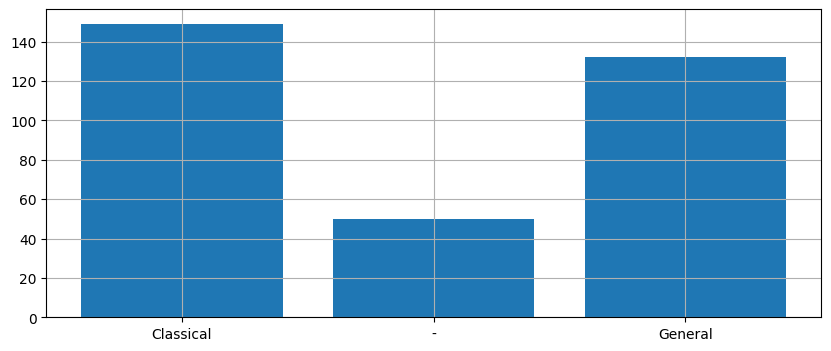

In [126]:
fig, ax = plt.subplots (figsize= (10, 4))
ax.bar (translated_labels3, hist3)
ax.grid()
# ax.yaxis.set_major_formatter (thousands_dot)
# ax.title ("")